## 1 introduction to the dataset
this dataset from amazon shows us the top 50 beststelling books from 2009 until 2019


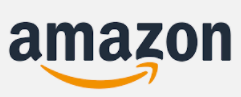



In [67]:
import pandas as pd
import numpy as np
#import missingno
#import fuzzywuzzy
#from fuzzywuzzy import process
import collections
import matplotlib.pyplot as plt
#from plotly.subplots import make_subplots
#import plotly.graph_objects as go
#import plotly.figure_factory as ff
#from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
import seaborn as sns

In [68]:
#load the dataset as df
df = pd.read_csv('bestsellers with categories.csv')
#show the first lines
df.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [69]:
# what columns we have and how many?
df.info()
print(f'we got {df.shape[0]} records and {df.shape[1]} columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB
we got 550 records and 7 columns


In [70]:
# convert the year and the genre into the right datatype
df.Genre = df.Genre.astype('category')
df['Year'] = pd.to_datetime(df['Year'])
#check again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         550 non-null    object        
 1   Author       550 non-null    object        
 2   User Rating  550 non-null    float64       
 3   Reviews      550 non-null    int64         
 4   Price        550 non-null    int64         
 5   Year         550 non-null    datetime64[ns]
 6   Genre        550 non-null    category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 26.6+ KB


In [71]:
#do we have any null values?
df.isna().sum() # we got luck :-)

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [72]:
# do we have duplicated data?
df.duplicated().sum()
# these code will only show us complete duplicates, but maybe a book is shown for several years. 
df.duplicated(['Name']).sum()
# so 199 books listen more than one time. 

199

In [73]:
#delete the year column and the double book name entries.
del df['Year']

In [74]:
df = df.drop_duplicates(keep = 'first')# only COMPLETE duplicates will be deleted. 
df.duplicated(['Name']).sum()
#looks like 10 book titles still got the same name 

10

In [75]:
#find the titles that still got the same name
booktitle = collections.Counter(df.Name.tolist())
booktitle.most_common(10)
#most_common() returns a list of top 'n' elements from most common to least common, as specified the parameter 'n'.

[('The Help', 3),
 ('Gone Girl', 2),
 ("Quiet: The Power of Introverts in a World That Can't Stop Talking", 2),
 ('The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change',
  2),
 ('The Fault in Our Stars', 2),
 ('The Girl on the Train', 2),
 ('The Immortal Life of Henrietta Lacks', 2),
 ('To Kill a Mockingbird', 2),
 ('Unbroken: A World War II Story of Survival, Resilience, and Redemption', 2),
 ('10-Day Green Smoothie Cleanse', 1)]

In [76]:
#this does still not explain why we got some titles more often. let´s see.
df[df['Name'] == 'Gone Girl']

,Name,Author,User Rating,Reviews,Price,Genre
135,Gone Girl,Gillian Flynn,4.0,57271,10,Fiction
137,Gone Girl,Gillian Flynn,4.0,57271,9,Fiction


In [77]:
#so now we see the difference is the price of the book. we will drop the duplicated and take keep the last entry
df = df.drop_duplicates(subset = 'Name', keep = 'last') # now we specify the subset Name
# and check
df.duplicated(['Name']).sum()

0

In [78]:
#was there a typo in the names of our authors?
authors = df.Author.sort_values().unique()
authors

array(['Abraham Verghese', 'Adam Gasiewski', 'Adam Mansbach', 'Adir Levy',
       'Admiral William H. McRaven', 'Adult Coloring Book Designs',
       'Alan Moore', 'Alex Michaelides', 'Alice Schertle', 'Allie Brosh',
       'American Psychiatric Association',
       'American Psychological Association', 'Amor Towles', 'Amy Ramos',
       'Amy Shields', 'Andy Weir', 'Angie Grace', 'Angie Thomas',
       'Ann Voskamp', 'Ann Whitford Paul', 'Anthony Bourdain',
       'Anthony Doerr', 'Atul Gawande', 'Audrey Niffenegger',
       'B. J. Novak', 'Bessel van der Kolk M.D.', 'Bill Martin Jr.',
       "Bill O'Reilly", 'Bill Simmons', 'Blue Star Coloring',
       'Bob Woodward', 'Brandon Stanton', 'Brené Brown',
       'Brian Kilmeade', 'Bruce Springsteen', 'Carol S. Dweck',
       'Celeste Ng', 'Charlaine Harris', 'Charles Duhigg',
       'Charles Krauthammer', 'Cheryl Strayed', 'Chip Gaines',
       'Chip Heath', 'Chris Cleave', 'Chris Kyle', 'Chrissy Teigen',
       'Christina Baker Kline', 

In [79]:
#two Authors are listed twice due to extra whitespae 
df = df.replace('George R. R. Martin', 'George R.R. Martin')
df = df.replace('J. K. Rowling', 'J.K. Rowling')
#recheck 
authors = df.Author.sort_values().unique()
authors

array(['Abraham Verghese', 'Adam Gasiewski', 'Adam Mansbach', 'Adir Levy',
       'Admiral William H. McRaven', 'Adult Coloring Book Designs',
       'Alan Moore', 'Alex Michaelides', 'Alice Schertle', 'Allie Brosh',
       'American Psychiatric Association',
       'American Psychological Association', 'Amor Towles', 'Amy Ramos',
       'Amy Shields', 'Andy Weir', 'Angie Grace', 'Angie Thomas',
       'Ann Voskamp', 'Ann Whitford Paul', 'Anthony Bourdain',
       'Anthony Doerr', 'Atul Gawande', 'Audrey Niffenegger',
       'B. J. Novak', 'Bessel van der Kolk M.D.', 'Bill Martin Jr.',
       "Bill O'Reilly", 'Bill Simmons', 'Blue Star Coloring',
       'Bob Woodward', 'Brandon Stanton', 'Brené Brown',
       'Brian Kilmeade', 'Bruce Springsteen', 'Carol S. Dweck',
       'Celeste Ng', 'Charlaine Harris', 'Charles Duhigg',
       'Charles Krauthammer', 'Cheryl Strayed', 'Chip Gaines',
       'Chip Heath', 'Chris Cleave', 'Chris Kyle', 'Chrissy Teigen',
       'Christina Baker Kline', 

In [80]:
df.info()
df.Author.value_counts()
        

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 0 to 546
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Name         351 non-null    object  
 1   Author       351 non-null    object  
 2   User Rating  351 non-null    float64 
 3   Reviews      351 non-null    int64   
 4   Price        351 non-null    int64   
 5   Genre        351 non-null    category
dtypes: category(1), float64(1), int64(2), object(2)
memory usage: 16.9+ KB


Jeff Kinney            12
Rick Riordan           10
J.K. Rowling            8
Stephenie Meyer         7
Dav Pilkey              6
                       ..
Christopher Paolini     1
Jennifer Smith          1
Sarah Young             1
David Grann             1
Jen Sincero             1
Name: Author, Length: 246, dtype: int64

In [81]:
#now we got 351 book title´s written by 246 titles

## 2 define the questions
<ol>
  <li>which author has written the most bestsellers?</li>
  <li>which 5 books got the most top reviews?</li>
  <li>is non-fiction or fiction more popular?</li>
  <li>which author got the highest average rating?</li>
  <li>are the genres different by rating?</li>
</ol>


Author
Jeff Kinney        12
Rick Riordan       10
J.K. Rowling        8
Stephenie Meyer     7
Bill O'Reilly       6
Dav Pilkey          6
E L James           5
Suzanne Collins     5
Name: Name, dtype: int64


Text(0.5, 1.0, 'author with the most bestseller')

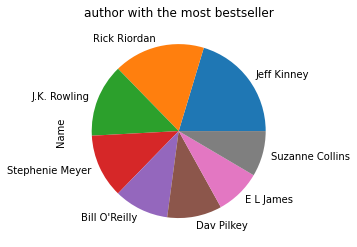

In [82]:
#which author has written the most bestsellers?
number_of_bestseller = df.groupby('Author')['Name'].count().sort_values(ascending  = False)
print(number_of_bestseller.head(8))
ax = number_of_bestseller.head(8).plot(kind = 'pie')
ax.set_title('author with the most bestseller')



In [83]:
# what are the best top 10 authors by user_ranking?
user_rating =df.groupby('Author')['User Rating'].mean().sort_values(ascending  = False)
print(user_rating.head(10))

Author
Nathan W. Pyle        4.9
Bill Martin Jr.       4.9
Jill Twiss            4.9
Rush Limbaugh         4.9
Pete Souza            4.9
Sarah Young           4.9
Lin-Manuel Miranda    4.9
Patrick Thorpe        4.9
Dav Pilkey            4.9
Alice Schertle        4.9
Name: User Rating, dtype: float64


Name
Where the Crawdads Sing    87841
The Girl on the Train      79446
Becoming                   61133
Gone Girl                  57271
The Fault in Our Stars     50482
Name: Reviews, dtype: int64


<AxesSubplot:xlabel='Name'>

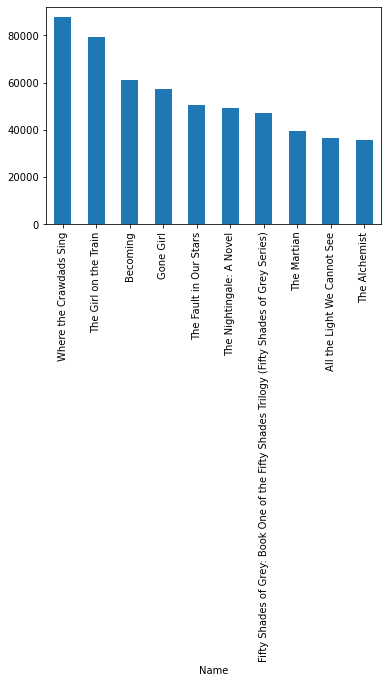

In [84]:
# which 5 books got the most reviews?
best_reviews =df.groupby('Name')['Reviews'].sum().sort_values(ascending  = False)
print(best_reviews.head(5))
best_reviews.head(10).plot(kind ='bar')

In [85]:
df.describe()

,User Rating,Reviews,Price
count,351.000000,351.000000,351.000000
mean,4.609117,9786.578348,12.968661
std,0.226721,10874.702548,10.021214
min,3.300000,37.000000,0.000000
25%,4.500000,3442.500000,7.500000
50%,4.600000,6310.000000,11.000000
75%,4.800000,11470.500000,16.000000
max,4.900000,87841.000000,105.000000


In [86]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User Rating,351.0,4.609117,0.226721,3.3,4.5,4.6,4.8,4.9
Reviews,351.0,9786.578348,10874.702548,37.0,3442.5,6310.0,11470.5,87841.0
Price,351.0,12.968661,10.021214,0.0,7.5,11.0,16.0,105.0


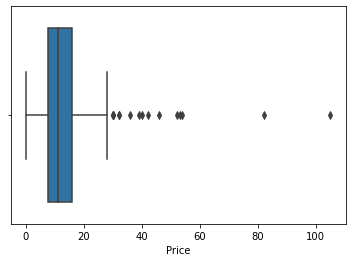

In [87]:
#make a boxplot for the price 
sns.boxplot(x = df['Price'])
Price = df['Price']

## finding the outliers for the price
the lower outliers  formula is Q1 - (1,5*iqR)
as to see underneath we got no lower outliers, but a lot of upper outliers 


In [88]:
q1 = np.quantile(df['Price'], 0.25)
q2 = np.quantile(df['Price'], 0.50)
q3 = np.quantile(df['Price'], 0.75)
q4 = np.quantile(df['Price'], 1.00)
print(q1,q2,q3,q4)
#IQR is q1-q3
IQR = q3-q1
print(IQR)
#now we can calculate the outliers
lower = q1 - 1.5 * IQR
upper = q3 + 1.5 *IQR
print(f'lower is {lower} and upper is {upper}')

outliers = Price[(Price < lower) | (Price > upper)]
outliers

7.5 11.0 16.0 105.0
8.5
lower is -5.25 and upper is 28.75


6       30
12      32
69     105
108     32
151     54
153     30
156     30
159     52
271     46
338     39
346     53
410     30
439     40
444     36
473     82
524     42
Name: Price, dtype: int64

<AxesSubplot:xlabel='User Rating'>

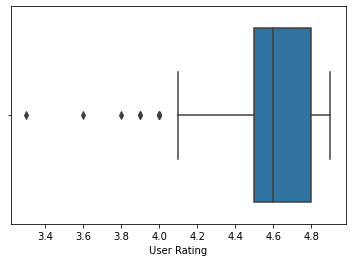

In [89]:
#make a boxplot for the user Ratings
sns.boxplot(x = df['User Rating'])

<AxesSubplot:xlabel='Reviews'>

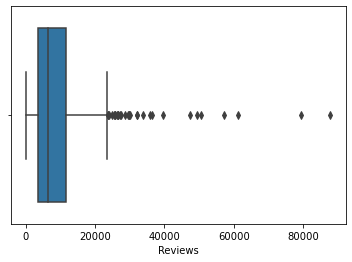

In [90]:
#make a boxplot for the reviews
sns.boxplot(x = df['Reviews'])

## correlation and covariance


### what is covariance?
the covariance show us if there is any relationship between two variables. the formula is 

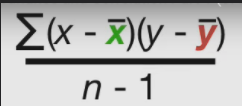

but there a few tricky items to keep in mind
<ol>
  <li>the covariance only works for linear data, so print the scatterplot first</li>
  <li>the result can be positive, negative or equal</li>
  <li>the result does NOT tell us if theline is steep or not </li>
  <li>the result does NOT tell us if the points are near the line or spread out</li>
  <li>the covariance value are sensitive to the scale of data, and this makes them difficult to interpret.</li>
</ol>


In [93]:
df.cov()

,User Rating,Reviews,Price
User Rating,0.051402,-1.383281e+02,-0.059999
Reviews,-138.328145,1.182592e+08,-5234.138966
Price,-0.059999,-5.234139e+03,100.424729


### what is the formula for correlation?
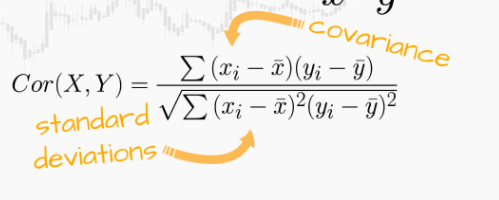

<ol>
  <li>only can help us with linear data </li>
  <li>the result can vary from -1 too +1</li>
  <li>a result of 1 will gives a positive slope that goes through the center of every data point</li>
</ol>